# Transforming data with Pandas 
In this mission, we'll continue working with the World Happiness Report and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:
```code
Series.map()
Series.apply()
DataFrame.applymap()
DataFrame.apply()
pd.melt()
```
Below are descriptions for some of the other columns we'll work with in this mission:

- Country - Name of the country
- Region - Name of the region the country belongs to
- Happiness Rank - The rank of the country, as determined by its happiness score
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- Dystopia Residual- Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this mission.
Let's start by renaming some of the columns in happiness2015.
### Instructions

Recall that the 2015 World Happiness Report is saved to a variable named happiness2015. We also created a dictionary named mapping for renaming columns.

- Use the DataFrame.rename() method to change the 'Economy (GDP per Capita)', 'Health (Life Expectancy)', and 'Trust (Government Corruption)' column names to the names specified in the mapping dictionary.
- Pass the mapping dictionary into the df.rename() method and set the axis parameter to 1.
- Assign the result back to happiness2015

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness2015 = happiness2015.rename(mapping, axis=1)


However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function:

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:
```python
Series.map() method
Series.apply() method
```
Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

![map](Map_Generic.svg)
We use the following syntax for both methods:

```python
def transform(x):
    return x+1
Series.map(transform)
Series.apply(transform)
```
Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called transform, we'd pass it into the apply() method as follows:
```python
def transform(val):
    return val
Series.apply(transform)
```
Let's compare the two methods in the next exercise.

### Instructions

- Use the Series.map() method to apply the label function to the Economy column in happiness2015. Assign the result to economy_impact_map.
- Use the Series.apply() method to apply the function to the Economy column. Assign the result to economy_impact_apply.
- Use the following code to check if the methods produce the same result: economy_impact_map.equals(economy_impact_apply). Assign the result to a variable named equal.

In [5]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_impact_map =  happiness2015.Economy.map(label)
economy_impact_apply =  happiness2015.Economy.apply(label)
equal = economy_impact_map.equals(economy_impact_apply)
equal

True

Since both map and apply can apply functions element-wise to a series, you may be wondering about the difference between them. Let's start by looking at a function with arguments.

In the label function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?
```python
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

economy_map = happiness2015['Economy'].map(label, x = .8)
```
When we try to apply the function to the Economy column with the map method, we get an error:

TypeError: map() got an unexpected keyword argument 'x'
Let's confirm the behavior of the apply method next.

### Instructions

- Update label to take in another argument named x. If the element is greater than x, return 'High'. Otherwise, return 'Low'.
     - Then, use the apply method to apply label to the Economy column and set the x argument to 0.8. Save the result back to economy_impact_apply.

In [7]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x=.8)

We learned in the last screen that we can only use the Series.apply() method to apply a function with additional arguments element-wise - the Series.map() method will return an error.

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the Series.map() or Series.apply() method to transform them as follows:
```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)
```
However, it would be easier to just apply the same function to all of the factor columns (Economy, Health, Family, Freedom, Generosity, Trust) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method.

Just like with the Series.map() and Series.apply() methods, we need to pass the function name into the df.applymap() method without parentheses.

Let's practice using the df.applymap() method next.

### Instructions

- We've already created a list named factors containing the column names for the six factors that contribute to the happiness score.

- Use the df.applymap() method to apply the label function to the columns saved in factors in happiness2015. Assign the result to factors_impact.

In [11]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)
factors_impact[:1]

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low


You can also use the apply() method on a dataframe, but the DataFrame.apply() method has different capabilities. Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise. When we create a function to use with df.apply(), we set it up to accept a series, most commonly a column.

Let's use the df.apply() method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, factors_impact. In order to do so, we'll apply the pd.value_counts function to all of the columns in the dataframe:

In [12]:
factors_impact.apply(pd.value_counts)


,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now, we can easily see that the Family and Economy columns contain the most 'High' values!

When we applied the pd.value_counts function to factors_impact, it calculated the value counts for the first column, Economy, then the second column, Family, so on and so forth:

![apply_counts](Apply_counts.svg)

Notice that we used the df.apply() method to transform multiple columns. This is only possible because the pd.value_counts function operates on a series. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error:
```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

happiness2015[factors].apply(label)
ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index Economy')
```
Let's practice using the df.apply() method in the next exercise.

### Instructions

- Create a function that calculates the percentage of 'High' and 'Low' values in each column.
    - Create a function named v_counts that accepts one parameter called col.
    - Use the Series.value_counts() method to calculate the value counts for col. Assign the result to num.
    - Use the Series.size attribute to calculate the number of rows in the column. Assign the result to den.
    - Divide num by den and return the result.
- Use the df.apply() method to apply the v_counts function to all of the columns in factors_impact. Assign the result to v_counts_pct.

In [13]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den
v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In general, we should only use the apply() method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the apply() method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the apply() method.

Next, we'll compare two different ways of performing an analysis task. First, we'll use the df.apply() method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the Dystopia Residual column equals the happiness score:
```python
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)
​
#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()
Happiness Score	Factors Sum
0	7.587	7.58696
1	7.561	7.56092
2	7.527	7.52708
3	7.522	7.52222
4	7.427	7.42694
```
The values we calculated in the Factors Sum column are slightly different than the values in the Happiness Score column, but the differences are so minor that we can attribute them to rounding. Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the df.apply() method the convert each of the values in the six factor columns and the Dystopia Residual column to percentages.

### Instructions

- Create a function that converts each of the six factor columns and the Dystopia Residual column to percentages.
    - Create a function named percentages that accepts one parameter called col.
    - Divide col by the Happiness Score column. Assign the result to div.
    - Multiply div by 100 and return the result.
- Use the df.apply() method to apply the percentages function to all of the columns in factors. Assign the result to factor_percentages.

In [17]:
def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div*100
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages[:6]
    

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
5,17.421685,17.799892,12.005266,8.664461,5.586281,3.152984,35.370645


However, it would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. We can accomplish this with the pd.melt() function.

To demonstrate this function, let's just work with a subset of happiness2015 called happy_two.

Country	Happiness Score	Economy	Family	Health
0	Switzerland	7.587	1.39651	1.34951	0.94143
1	Iceland	7.561	1.30232	1.40223	0.94784
Below, we use the melt function to reshape happy_two so that the values for Economy, Family, and Health reside in the same column:
```python
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])
Below are the results:

Country	variable	value
0	Switzerland	Economy	1.39651
1	Iceland	Economy	1.30232
2	Switzerland	Family	1.34951
3	Iceland	Family	1.40223
4	Switzerland	Health	0.94143
5	Iceland	Health	0.94784
```
Now, we can use vectorized operations to transform the value column at once!

Below is a summary of the syntax we used to work with the melt function:

![melt](Melt_syntax.svg)

Let's reshape all of happiness2015 with the melt function next.

### Instructions

- Use the melt function to reshape happiness2015. The columns listed in main_cols should stay the same. The columns listed in factors should be transformed into rows. Assign the result to a variable called melt.
- Convert the value column to a percentage.
    - Divide the value column by the Happiness Score column and multiply the result by 100.
    - Use the round() function to round the result to 2 decimal places.
    - Assign the result to a new column called Percentage.

In [22]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015,id_vars=main_cols, value_vars=factors)
melt['Percentage'] =  round((melt.value/melt['Happiness Score'])*100,2)

In [23]:
melt[:10]

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
5,Finland,Western Europe,6,7.406,Economy,1.29025,17.42
6,Netherlands,Western Europe,7,7.378,Economy,1.32944,18.02
7,Sweden,Western Europe,8,7.364,Economy,1.33171,18.08
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018,17.16
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358,18.31


Let's repeat the same task, but this time, we'll group the data by the variable column instead of the Year column and plot the results using a pie chart.

### Instructions

- Use the df.pivot_table() method to create a pivot table from the melt dataframe. Set the variable column as the index and the value column as the values. Assign the result to pv_melt.
- Use the df.plot() method to create a pie chart of the results. Set the kind parameter to 'pie', the y parameter to 'value', and the legend parameter to False, so we can better see the results.
- If we disregard Dystopia Residual, which two factors, on average, contribute the most to the happiness score?

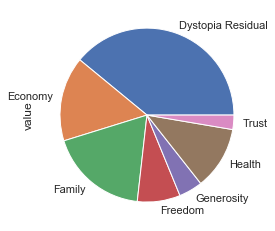

In [25]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)